In [84]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from scipy.stats import randint as sp_randint

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA


In [37]:
style.use("ggplot")

In [38]:
dataset = pd.read_csv('Dow_adjcloses.csv',index_col=0)
# the first column is the index (date)
# %%
# INSPECT DATA 
dataset.head()
dataset.tail()
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,363.000000,...,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,2741.000000,4804.000000,4804.000000
mean,86.768590,49.659383,49.106634,85.481517,56.697445,61.735451,21.652896,24.983814,46.367724,64.897404,...,23.724266,20.736962,49.959573,55.961115,62.208919,64.417705,27.193436,53.323035,50.766604,41.696637
std,53.941623,22.564051,55.020296,79.084514,34.663396,31.713863,10.074094,10.611235,32.733220,5.768347,...,20.987536,7.629779,19.769481,34.644166,32.626864,62.920008,11.973258,37.647367,17.039732,19.937069
min,25.140195,8.713025,0.827607,17.463252,9.247340,17.565805,6.842430,11.698790,11.018313,49.090000,...,2.594833,8.041066,16.203766,13.286538,14.520547,5.175169,11.209926,9.846111,30.747677,17.317194
25%,51.191601,34.078903,3.899987,37.406768,26.335348,31.820217,14.910132,15.419998,22.044106,62.249826,...,8.036966,15.030615,35.413562,29.906759,34.328042,23.498173,17.433612,18.958517,38.062387,27.704467
50%,63.513883,42.274116,23.316182,58.436552,53.047521,56.941779,18.577993,20.563342,29.521283,66.586254,...,14.146826,18.643331,46.734628,39.823712,55.714581,42.923977,21.556066,45.207207,42.782495,32.705776
75%,122.906370,66.815558,84.007174,112.996317,76.487605,91.687905,24.649935,34.927140,75.833054,69.143042,...,36.544526,25.402775,68.134961,80.767355,92.557058,73.170959,38.995728,76.966054,65.076409,58.164790
max,251.980826,112.420728,231.260273,411.110000,166.832487,128.679825,63.698248,50.400000,117.972904,75.261152,...,85.300186,45.841240,98.030000,146.564192,141.279565,286.330000,60.016174,150.524693,107.009557,90.187639


**Data Visulization** 
the data will be performed after implementing the Dimensionality Reduction Models.

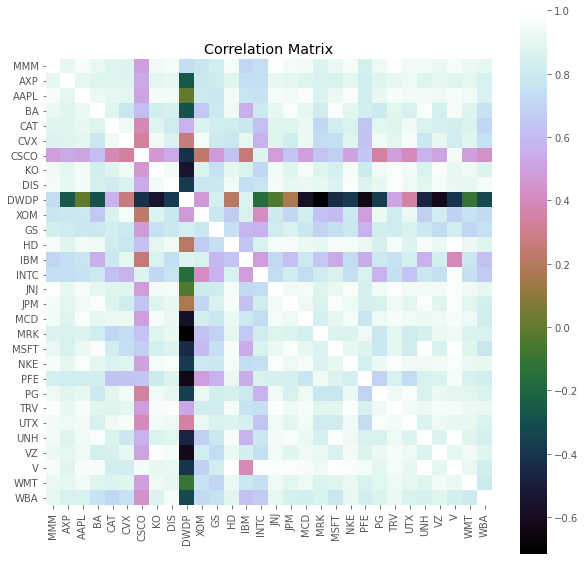

In [39]:
# %% Visualise data
import matplotlib.pyplot as plt
import seaborn as sns
correlation = dataset.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=False,cmap='cubehelix')



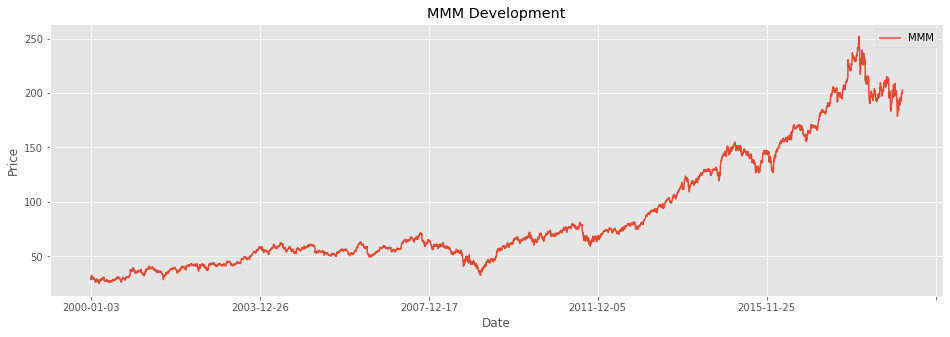

In [40]:
# %% visualise one time series

plt.figure(figsize=(16, 5))
plt.title("MMM Development")
plt.ylabel("Price")
dataset.MMM.plot()
plt.grid(True)
plt.legend()
plt.show()


In [41]:
#%% data cleaning
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())


Null Values = True


In [42]:
#Getting rid of the columns with more than 30% missing values.

missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
missing_fractions.head()

drop_list = list(missing_fractions[missing_fractions > 0.3].index)
dataset.drop(labels=drop_list, axis=1, inplace=True)

print('NA Values =',dataset.isna().values.any())

NA Values = False


In [43]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.52222,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.89986,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354


In [67]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

**Data Transformation**.

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713383,0.565603,-2.707674,-1.133045,-1.041247,-0.787063,-1.834413,3.568833,0.725353,0.981056,...,-1.936268,3.666524,-0.172523,1.771791,-0.936081,-1.954189,0.076018,-0.836288,-1.374665,2.942150
2000-01-20,-3.564118,1.077343,3.304005,-1.670108,-2.833568,-0.445782,0.021934,0.987042,-2.415069,-1.897394,...,-0.733208,-1.816361,-1.420880,-2.741513,-0.475716,-1.915682,1.653794,0.241016,-0.987037,-0.035748


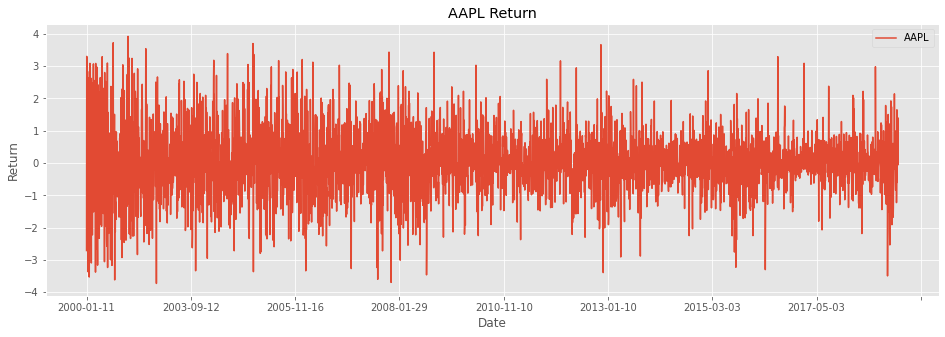

In [69]:
# Visualizing Log Returns for the DJIA 
plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
plt.ylabel("Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

Train Test Split
The portfolio is divided into train and test split to perform the analysis regarding the best porfolio 

In [70]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

**Model Evaluation**

In [71]:
pca = PCA()
PrincipalComponent=pca.fit(X_train)

In [72]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

,Explained Variance
0,37.03%
1,42.75%
2,47.10%
3,51.08%
4,54.60%
5,57.74%
6,60.65%
7,63.44%
8,66.18%
9,68.71%


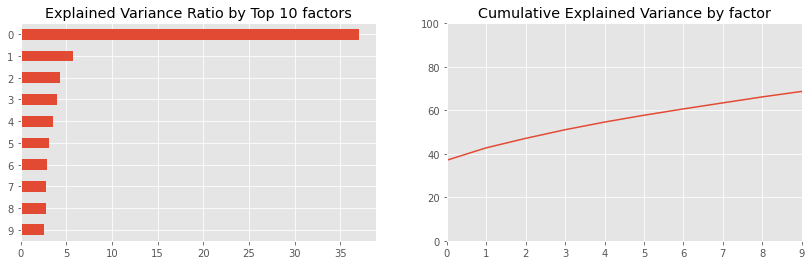

In [73]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

scatterplot that visualizes an organized descending plot with the respective weight of every company at the current chosen principle component.

In [74]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [75]:
weights[0]


array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

In [76]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

In [77]:
weights[0]


array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f172a6fa250>],
      dtype=object)

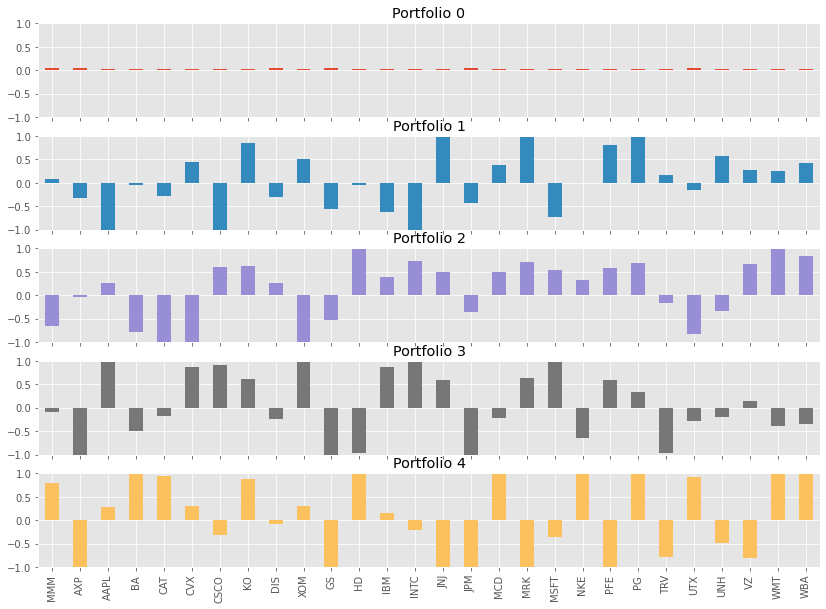

In [78]:
NumComponents=5
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

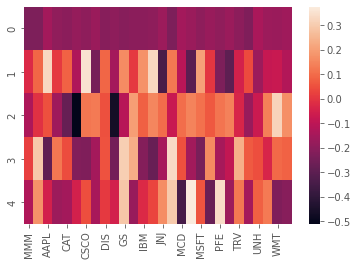

In [79]:
# plotting heatmap 
sns.heatmap(topPortfolios) 

**Finding the Best Eigen Portfolio**

In [80]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

construct a loop to compute the principle component’s weights for each eigen portfolio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


Eigen portfolio #0 with the highest Sharpe. Return 11.47%, vol = 13.31%, Sharpe = 0.86
      Return       Vol    Sharpe
0   0.114739  0.133133  0.861838
7   0.095771  0.693481  0.138102
5   0.100020  0.844943  0.118375
1   0.056561  0.670429  0.084366
2  -0.106559  0.858820 -0.124076
11 -1.000000  7.227664 -0.138357
13 -0.399292  2.069889 -0.192905
25 -1.000000  5.009294 -0.199629
23 -1.000000  4.955034 -0.201815
6  -0.416203  1.967123 -0.211580
10 -0.157622  0.738399 -0.213465
3  -0.162130  0.738014 -0.219684
26 -0.999993  4.535175 -0.220497
8  -0.422215  1.396786 -0.302276
17 -0.998332  3.277252 -0.304625
24 -0.550144  1.728886 -0.318207
16 -0.980029  3.037992 -0.322591
21 -0.470440  1.420469 -0.331187
14 -0.886228  2.571136 -0.344684
27 -0.932511  2.605850 -0.357853


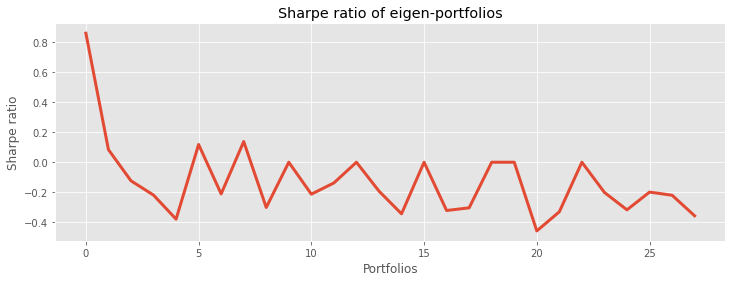

In [81]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()
        

Sum of weights of current eigen-portfolio: 100.00


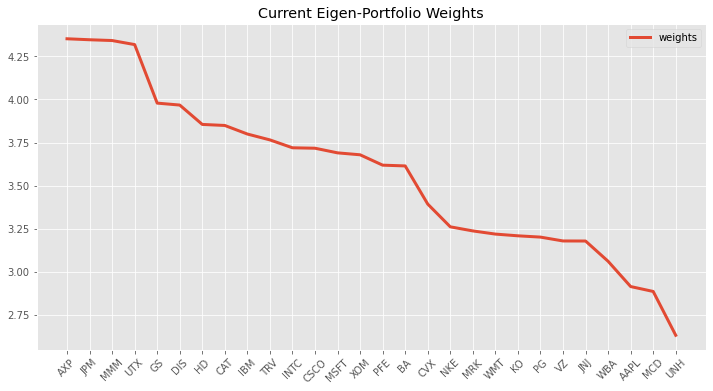

,weights
AXP,4.351486
JPM,4.345819
MMM,4.341287
UTX,4.317801
GS,3.978690
DIS,3.967455
HD,3.855280
CAT,3.849228
IBM,3.799613
TRV,3.765610


In [82]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

**Backtesting Eigenportfolio**

Current Eigen-Portfolio:
Return = 32.76%
Volatility = 68.64%
Sharpe = 0.48


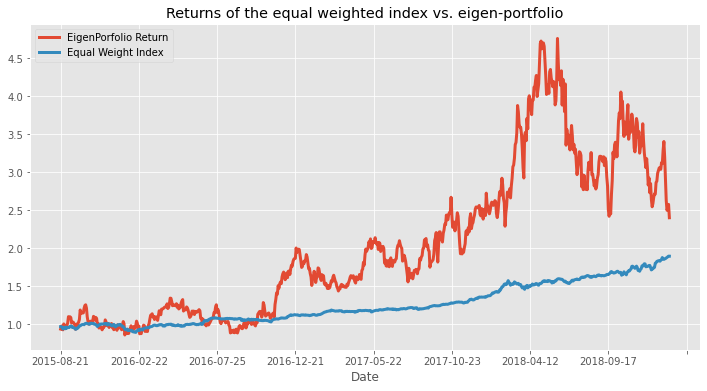

Current Eigen-Portfolio:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


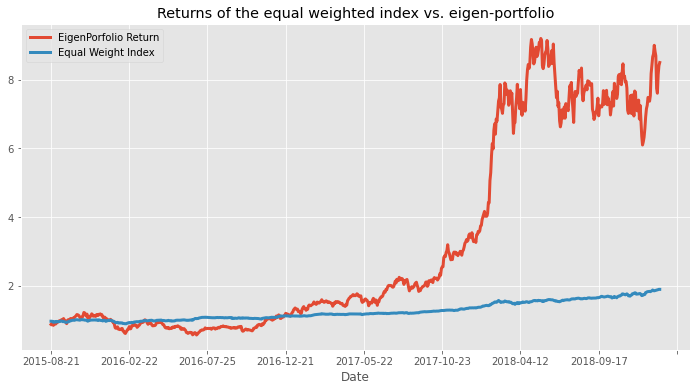

Current Eigen-Portfolio:
Return = -79.42%
Volatility = 185.30%
Sharpe = -0.43


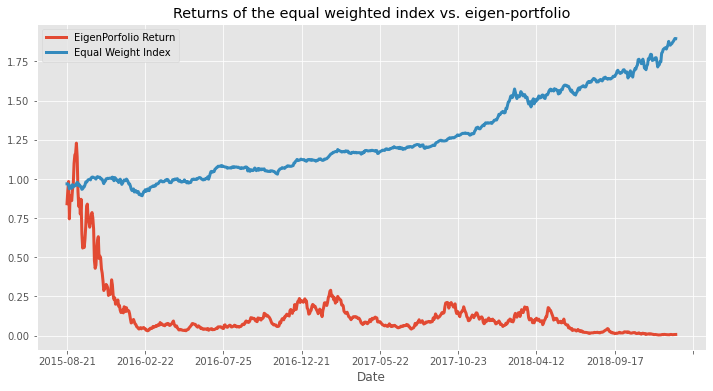

In [83]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[5])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])

** **Conclusion** 

As shown in charts above the eigen portfolio return of the top portfolios outperform the equally weighted portfolio and the eigen portfolio ranked 19 underperformed the market significantly in the test set.

At the backtesting result, the portfolio with the best result in the training set leads to the best result in the test set. By using PCA, i can see independent eigen portfo‐ lios with higher return and sharp ratio as compared to market.


